<a href="https://colab.research.google.com/github/Shailashree/Newgittest/blob/master/ANN_Credit_score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Credit score classification

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.utils.class_weight import compute_class_weight

# TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1
import pickle

##TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1




In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
train_dataset = pd.read_csv('gdrive/MyDrive/Credit score classification/train.csv')
train_dataset["is_train"] = True
test_dataset = pd.read_csv('gdrive/MyDrive/test.csv')
test_dataset["is_train"] = False
df = pd.concat([train_dataset, train_dataset])

<ipython-input-5-f89e254ddb79>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_dataset = pd.read_csv('gdrive/MyDrive/Credit score classification/train.csv')


In [6]:
df.head(10)

ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12                    NaN                  3  ...   
2  Scientist      19114.12                    NaN                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4  Scientist      19114.12            1824.843333                  3  ...   
5  Scientist      19114.12                    NaN                  3  ...   
6  Scientist      19114.12            1824.843333                  3  ...   
7  Scientist      19114.12            1824.843333                  3  ...   
8    _______      34847.84            3037.986667                  2  ...   
9    Teacher      34847.84            3037.986667                  2  ...   

   Outstanding_Debt  Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                 26.822620  22 Years and 1 Months   
1            809.98                 31.944960                    NaN   
2            809.98                 28.609352  22 Years and 3 Months   
3            809.98                 31.377862  22 Years and 4 Months   
4            809.98                 24.797347  22 Years and 5 Months   
5            809.98                 27.262259  22 Years and 6 Months   
6            809.98                 22.537593  22 Years and 7 Months   
7            809.98                 23.933795                    NaN   
8            605.03                 24.464031  26 Years and 7 Months   
9            605.03                 38.550848  26 Years and 8 Months   

  Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
0                    No            49.574949       80.41529543900253   
1                    No            49.574949      118.28022162236736   
2                    No            49.574949         81.699521264648   
3                    No            49.574949       199.4580743910713   
4                    No            49.574949      41.420153086217326   
5                    No            49.574949      62.430172331195294   
6                    No            49.574949       178.3440674122349   
7                    No            49.574949      24.785216509052056   
8                    No            18.816215        104.291825168246   
9                    No            18.816215       40.39123782853101   

                  Payment_Behaviour     Monthly_Balance Credit_Score is_train  
0   High_spent_Small_value_payments  312.49408867943663         Good     True  
1    Low_spent_Large_value_payments  284.62916249607184         Good     True  
2   Low_spent_Medium_value_payments   331.2098628537912         Good     True  
3    Low_spent_Small_value_payments  223.45130972736786         Good     True  
4  High_spent_Medium_value_payments  341.48923103222177         Good     True  
5                            !@9#%8   340.4792117872438         Good     True  
6    Low_spent_Small_value_payments   244.5653167062043         Good     True  
7  High_spent_Medium_value_payments  358.12416760938714     Standard     True  
8    Low_spent_Small_value_payments  470.69062692529184     Standard   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        200000 non-null  object 
 1   Customer_ID               200000 non-null  object 
 2   Month                     200000 non-null  object 
 3   Name                      180030 non-null  object 
 4   Age                       200000 non-null  object 
 5   SSN                       200000 non-null  object 
 6   Occupation                200000 non-null  object 
 7   Annual_Income             200000 non-null  object 
 8   Monthly_Inhand_Salary     169996 non-null  float64
 9   Num_Bank_Accounts         200000 non-null  int64  
 10  Num_Credit_Card           200000 non-null  int64  
 11  Interest_Rate             200000 non-null  int64  
 12  Num_of_Loan               200000 non-null  object 
 13  Type_of_Loan              177184 non-null  object 

In [8]:
df.Credit_Score.value_counts()

Credit_Score
Standard    106348
Poor         57996
Good         35656
Name: count, dtype: int64

In [9]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      51026
High_spent_Medium_value_payments    35080
Low_spent_Medium_value_payments     27722
High_spent_Large_value_payments     27442
High_spent_Small_value_payments     22680
Low_spent_Large_value_payments      20850
!@9#%8                              15200
Name: count, dtype: int64

In [10]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    72958
Good        48674
_           40390
Bad         37978
Name: count, dtype: int64

In [11]:
df.Occupation.value_counts()

Occupation
_______          14124
Lawyer           13150
Architect        12710
Engineer         12700
Scientist        12598
Mechanic         12582
Accountant       12542
Developer        12470
Media_Manager    12464
Teacher          12430
Entrepreneur     12348
Doctor           12174
Journalist       12170
Manager          11946
Musician         11822
Writer           11770
Name: count, dtype: int64

In [12]:
df[df.duplicated(keep=False)]

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
0                809.98                 26.822620   22 Years and 1 Months   
1                809.98                 31.944960                     NaN   
2                809.98                 28.609352   22 Years and 3 Months   
3                809.98                 31.377862   22 Years and 4 Months   
4                809.98                 24.797347   22 Years and 5 Months   
...                 ...                       ...                     ...   
99995            502.38                 34.663572   31 Years and 6 Months   
99996            502.38                 40.565631   31 Years and 7 Months   
99997            502.38                 41.255522   31 Years and 8 Months   
99998            502.38                 33.638208   31 Years and 9 Months   
99999            502.38                 34.192463  31 Years and 10 Months   

      Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
0                        No            49.574949       80.41529543900253   
1                        No            49.574949      118.28022162236736   
2                        No            49.574949         81.699521264648   
3                        No            49.574949       199.4580743910713   
4                        No            49.574949      41.420153086217326   
...                     ...                  ...                     ...   
99995                    No            35.104023       60.97133255718485   
99996                    No            35.104023       54.18595028760385   
99997                    No            35.104023       24.02847744864441   
99998                    No            35.104023      251.67258219721603   
99999                    No            35.104023       167.1638651610451   

                      Payment_Behaviour     Monthly_Balance Credit_Score  \
0       High_spent_Small_value_payments  312.49408867943663         Good   
1        Low_spent_Large_value_payments  284.62916249607184         Good   
2       Low_spent_Medium_value_payments   331.2098628537912         Good   
3       

In [13]:
df = df.drop(['ID','Name','Customer_ID','Month','SSN','Type_of_Loan'],axis = 1)

In [14]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are 100000 duplicated observations in the dataset.
100000 duplicates were dropped!
No more duplicate rows!


In [15]:
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Map the target variable using the defined mapping
df['Credit_Score'] = df['Credit_Score'].map(target_mapping)

In [16]:
df = df.replace("_", "", regex=True)
df[df.eq('').any(axis=1)]

Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0        23  Scientist      19114.12            1824.843333   
2      -500  Scientist      19114.12                    NaN   
8        28                 34847.84            3037.986667   
10       28    Teacher      34847.84            3037.986667   
16       34                143162.64           12187.220000   
...     ...        ...           ...                    ...   
99989    28                 20002.88            1929.906667   
99992    24   Mechanic      39628.99            3359.415833   
99994    25   Mechanic      39628.99            3359.415833   
99995    25   Mechanic      39628.99            3359.415833   
99996    25   Mechanic      39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                      3                4              3           4   
2                      3                4              3           4   
8                      2                4              6           1   
10                     2             1385              6           1   
16                     1                5              8           3   
...                  ...              ...            ...         ...   
99989                 10                8             29           5   
99992                  4                6              7           2   
99994                  4                6              7           2   
99995                  4                6              7           2   
99996                  4                6              7           2   

       Delay_from_due_date Num_of_Delayed_Payment  ... Outstanding_Debt  \
0                        3                      7  ...           809.98   
2                        3                      7  ...           809.98   
8                        3                      4  ...           605.03   
10                       3                     -1  ...           605.03   
16                       5                      8  ...          1303.01   
...                    ...                    ...  ...              ...   
99989                   33                     25  ...           3571.7   
99992                   23                    NaN  ...           502.38   
99994                   20                      6  ...           502.38   
99995                   23                      7  ...           502.38   
99996                   18                      7  ...           502.38   

       Credit_Utilization_Ratio     Credit_History_Age Payment_of_Min_Amount  \
0                     26.822620  22 Years and 1 Months                    No   
2                     28.609352  22 Years and 3 Months                    No   
8                     24.464031  26 Years and 7 Months                    No   
10                    33.224951  26 Years and 9 Months                    No   
16                    28.616735  17 Years and 9 Months                    No   
...                         ...                    ...                   ...   
99989                 33.359987   6 Years and 1 Months                   Yes   
99992                 32.991333  31 Years and 3 Months                    No   
99994                 39.323569  31 Years and 5 Months                    No   
99995                 34.663572  31 Years and 6 Months                    No   
99996                 40.565631  31 Years and 7 Months                    No   

       Total_EMI_per_month Amount_invested_monthly  \
0                49.574949       80.41529543900253   
2                49.574949         81.699521264648   
8                18.816215        104.291825168246   
10               18.816215       58.51597569589465   
16              246.992319        168.413702679309   
...                    ...                     ...   
99989            60.964772       74.36660309585342   
99992            35.104023       401.1964806036356   
99994            35.104023      140.58

In [17]:
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Fill empty values with np.nan in selected rows
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [18]:
df.describe().T

count         mean          std         min  \
Monthly_Inhand_Salary      84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts         100000.0    17.091280   117.404834   -1.000000   
Num_Credit_Card           100000.0    22.474430   129.057410    0.000000   
Interest_Rate             100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date       100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries       98035.0    27.754251   193.177339    0.000000   
Credit_Utilization_Ratio  100000.0    32.285173     5.116875   20.000000   
Total_EMI_per_month       100000.0  1403.118217  8306.041270    0.000000   
Credit_Score              100000.0     0.888300     0.675120    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card              4.000000     5.000000     7.000000   1499.000000  
Interest_Rate                8.000000    13.000000    20.000000   5797.000000  
Delay_from_due_date         10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries         3.000000     6.000000     9.000000   2597.000000  
Credit_Utilization_Ratio    28.052567    32.305784    36.496663     50.000000  
Total_EMI_per_month         30.306660    69.249473   161.224249  82331.000000  
Credit_Score                 0.000000     1.000000     1.000000      2.000000

In [19]:
df.describe(include='object').T

count unique                           top   freq
Age                      100000   1728                            38   2994
Occupation                92938     15                        Lawyer   6575
Annual_Income            100000  13487                      17816.75     16
Num_of_Loan              100000    414                             3  15104
Num_of_Delayed_Payment    92998    711                            19   5481
Changed_Credit_Limit      97909   4383                          8.22    133
Credit_Mix                79805      3                      Standard  36479
Outstanding_Debt         100000  12203                       1109.03     24
Credit_History_Age        90970    404        15 Years and 11 Months    446
Payment_of_Min_Amount    100000      3                           Yes  52326
Amount_invested_monthly   95521  91049                         10000   4305
Payment_Behaviour        100000      7    LowspentSmallvaluepayments  25513
Monthly_Balance           98800  98792  -333333333333333333333333333      9

In [20]:
## Find and Change wrong/missing values

In [21]:
df.Age.nunique()

1728

In [22]:
df.Age.value_counts(ascending=False).head(10)

Age
38    2994
28    2968
31    2955
26    2945
32    2884
36    2868
35    2866
25    2861
27    2859
39    2846
Name: count, dtype: int64

In [23]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df[df['Age'] < 0]['Age'].unique()

array([-500])

In [24]:
df[df['Age'] > 100]['Age'].unique()

array([7580,  181,  995, ..., 4808, 2263, 1342])

In [25]:
df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 0].index, inplace = True)

In [26]:
df.shape

(97224, 23)

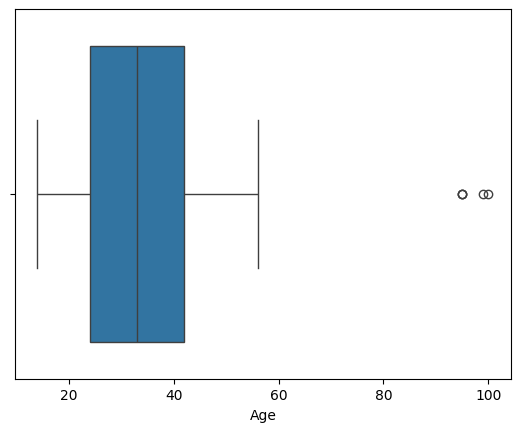

In [27]:
sb.boxplot(data= df, x= df.Age);

In [28]:
# Occupation

In [29]:
df.Occupation.value_counts()

Occupation
Lawyer          6389
Architect       6175
Engineer        6172
Scientist       6113
Accountant      6110
Mechanic        6099
MediaManager    6068
Teacher         6049
Developer       6031
Entrepreneur    6015
Doctor          5916
Journalist      5906
Manager         5807
Musician        5760
Writer          5741
Name: count, dtype: int64

In [30]:
df.Occupation.isna().sum()

6873

In [31]:
df.loc[pd.isna(df['Occupation']), 'Occupation'] = 'Other'

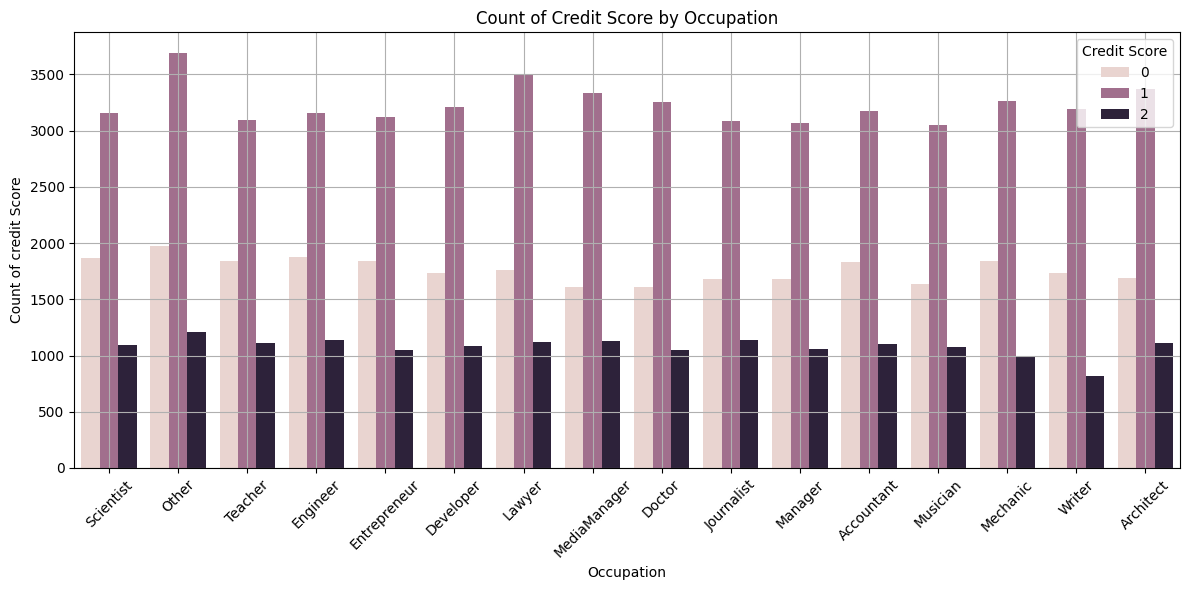

In [32]:
import seaborn as sb
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sb.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count of credit Score')
plt.title('Count of Credit Score by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Num_Bank_Accounts

In [34]:
import re

def non_numeric_values(df, column_name):
    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'

    # Find non-numeric values using regular expression
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)

    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]

    # Use set to ensure uniqueness
    unique_non_numeric_values = set(non_numeric_values)

    return unique_non_numeric_values

unique_non_numeric = non_numeric_values(df, 'Age')
print(unique_non_numeric)

set()


In [35]:
non_numeric_values(df, 'Num_Bank_Accounts')

{'-'}

In [36]:
df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count()

21

In [37]:
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)

<Axes: xlabel='Num_Bank_Accounts'>

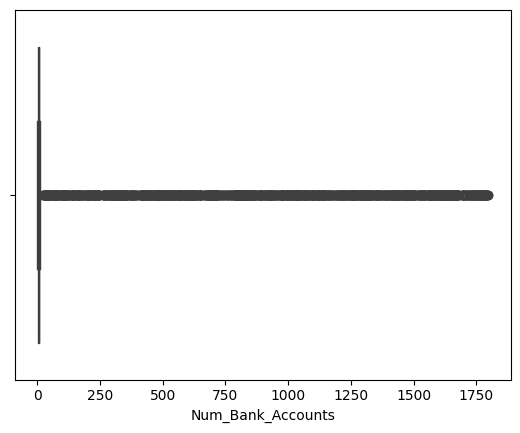

In [38]:
sb.boxplot(data = df,x= df.Num_Bank_Accounts)

In [39]:
# Num_of_Loan

In [40]:
non_numeric_values(df, 'Num_of_Loan')

{'-'}

In [41]:
df[df.Num_Bank_Accounts < 0]['Num_of_Loan'].count()

0

In [42]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')


In [43]:
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique()

array([-100])

In [44]:
df['Num_of_Loan'].unique()

array([   4,    1,    3,  967, -100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352, 1017,  945,  146,  563,  341,  720, 1485,
         49,  737, 1106,  466,  728,  313,  597,  119,  663,  640,   92,
       1019,  501, 1302,   39,  716,  848,  931, 1214,  186,  424, 1001,
       1110, 1152,  457, 1433, 1187,   52, 1480, 1047, 1035, 1347,   33,
        193,  699,  329, 1451,  484,  649,  995,  545,  684, 1135, 1094,
       1204,  654,   58,  348,  614, 1363,  323, 1406, 1348,  430,  153,
       1461,  905, 1312, 1424, 1154,   95, 1353, 1228,  819, 1006,  795,
        359, 1209,  590,  696, 1185, 1465,  911,   70,  816, 1369,  143,
       1416,  455,   55, 1096, 1474,  420,  904,   89, 1259,  527, 1241,
        449,  983,  418,  319,   23,  238,  638,  138,  235,  280, 1070,
       1484,  274,  494, 1459,  404, 1354, 1495, 1391,  601, 1313, 1319,
        898,  231,  752,  174,  961, 1046,  834,  284,  438,  288, 1463,
       1151,  719,  198, 1015,  855,  841,  392, 14

In [45]:
df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)

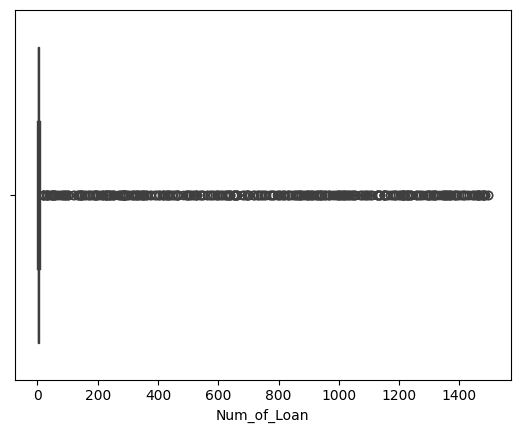

In [46]:
sb.boxplot(data= df, x = df.Num_of_Loan);


In [47]:
# Delay_from_due_date

In [48]:
non_numeric_values(df, 'Delay_from_due_date')

{'-'}

In [49]:
df['Delay_from_due_date']

0         3
1        -1
3         5
4         6
5         8
         ..
99995    23
99996    18
99997    27
99998    20
99999    18
Name: Delay_from_due_date, Length: 93433, dtype: int64

In [50]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique()  # not possible

array([-1, -2, -3, -5, -4])

In [51]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].count()  # not possible

547

In [52]:
df['Num_of_Loan'].nunique()


398

In [53]:
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace = True)

<Axes: xlabel='Delay_from_due_date'>

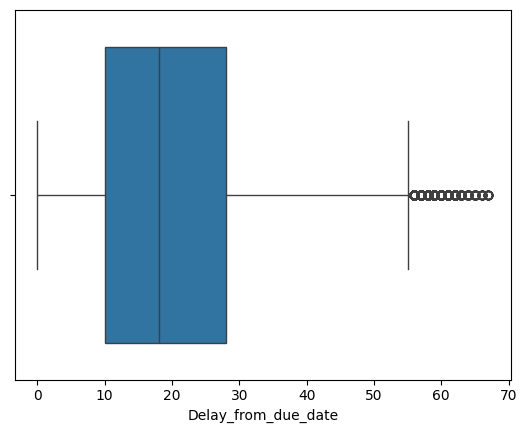

In [54]:
sb.boxplot(data=df, x=df.Delay_from_due_date)

In [55]:
## Num_of_Delayed_Payment

In [56]:
non_numeric_values(df, 'Num_of_Delayed_Payment')

{'-', 'nan'}

In [57]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

In [58]:
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -3., -2.])

In [59]:
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace= True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92294 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       92294 non-null  int64  
 1   Occupation                92294 non-null  object 
 2   Annual_Income             92294 non-null  object 
 3   Monthly_Inhand_Salary     78448 non-null  float64
 4   Num_Bank_Accounts         92294 non-null  int64  
 5   Num_Credit_Card           92294 non-null  int64  
 6   Interest_Rate             92294 non-null  int64  
 7   Num_of_Loan               92294 non-null  int64  
 8   Delay_from_due_date       92294 non-null  int64  
 9   Num_of_Delayed_Payment    85804 non-null  float64
 10  Changed_Credit_Limit      90360 non-null  object 
 11  Num_Credit_Inquiries      90484 non-null  float64
 12  Credit_Mix                73627 non-null  object 
 13  Outstanding_Debt          92294 non-null  object 
 14  Credit_Util

<Axes: xlabel='Num_of_Delayed_Payment'>

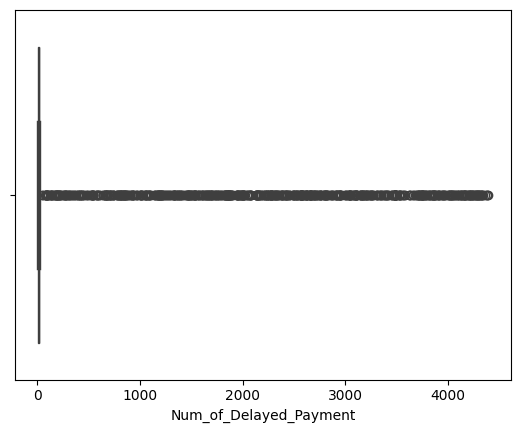

In [61]:
#sb.boxplot(data= df,x=df['Num_of_Delayed_Payment'])
sb.boxplot(data=df, x=df.Num_of_Delayed_Payment)

In [62]:
df['Num_of_Delayed_Payment'].value_counts()

Num_of_Delayed_Payment
17.0      5080
19.0      5065
16.0      4951
10.0      4941
15.0      4888
          ... 
1795.0       1
1941.0       1
1534.0       1
3739.0       1
2047.0       1
Name: count, Length: 664, dtype: int64

In [63]:
## Num_Credit_Inquiries

In [64]:
non_numeric_values(df, 'Num_Credit_Inquiries')

{'.', 'nan'}

In [65]:
df['Num_Credit_Inquiries'].value_counts()

Num_Credit_Inquiries
4.0       10314
3.0        8103
6.0        7560
7.0        7516
8.0        7311
          ...  
895.0         1
1753.0        1
782.0         1
1294.0        1
74.0          1
Name: count, Length: 1160, dtype: int64

In [66]:
df[df['Num_Credit_Inquiries'] < 0 ]['Num_Credit_Inquiries'].unique()

array([], dtype=float64)

In [67]:
df[df['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].nunique()

0

<Axes: xlabel='Num_Credit_Inquiries'>

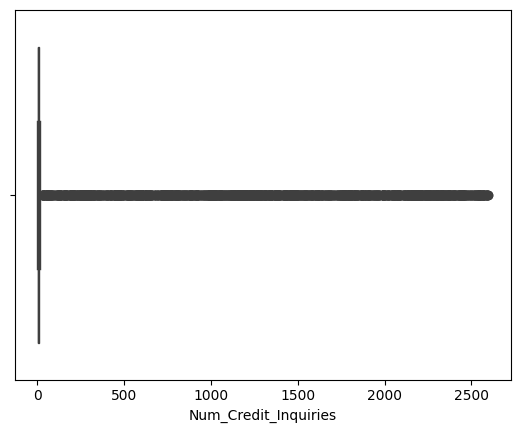

In [68]:
sb.boxplot(data=df, x=df.Num_Credit_Inquiries.dropna())

In [69]:
## Credit_Mix

In [70]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    34131
Good        21741
Bad         17755
Name: count, dtype: int64

In [71]:
non_numeric_values(df, 'Credit_Mix')

{'Bad', 'Good', 'Standard', 'nan'}

In [72]:
df.Credit_Mix.isna().sum()

18667

In [73]:
df['Credit_Mix'].fillna('Unknown', inplace=True)

<ipython-input-73-ca601f75a9ac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_Mix'].fillna('Unknown', inplace=True)


In [74]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    34131
Good        21741
Unknown     18667
Bad         17755
Name: count, dtype: int64

In [75]:
## Credit_History_Age

In [76]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    414
19 Years and 5 Months     408
19 Years and 3 Months     407
17 Years and 9 Months     407
15 Years and 9 Months     406
                         ... 
0 Years and 3 Months       19
33 Years and 7 Months      14
0 Years and 2 Months       13
33 Years and 8 Months      10
0 Years and 1 Months        1
Name: count, Length: 404, dtype: int64

In [77]:
df['Credit_History_Age'].isna().sum()

8356

In [78]:
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])

In [79]:
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)

<ipython-input-79-b18311f78f77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)


In [80]:
df['Credit_History_Age'].isna().sum()

0

In [81]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
19 Years and 5 Months     3525
30 Years and 2 Months     2203
15 Years and 9 Months     2102
8 Years and 10 Months     1828
15 Years and 11 Months     414
                          ... 
0 Years and 3 Months        19
33 Years and 7 Months       14
0 Years and 2 Months        13
33 Years and 8 Months       10
0 Years and 1 Months         1
Name: count, Length: 404, dtype: int64

In [82]:
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)

In [83]:
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

In [84]:
df.drop(columns=['Credit_History_Age'], inplace=True)

df.head()

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23  Scientist      19114.12            1824.843333                  3   
3   23  Scientist      19114.12                    NaN                  3   
4   23  Scientist      19114.12            1824.843333                  3   
5   23  Scientist      19114.12                    NaN                  3   
6   23  Scientist      19114.12            1824.843333                  3   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4              3            4                    3   
3                4              3            4                    5   
4                4              3            4                    6   
5                4              3            4                    8   
6                4              3            4                    3   

   Num_of_Delayed_Payment  ... Credit_Utilization_Ratio  \
0                     7.0  ...                26.822620   
3                     4.0  ...                31.377862   
4                     NaN  ...                24.797347   
5                     4.0  ...                27.262259   
6                     8.0  ...                22.537593   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   
5                     No           49.574949      62.430172331195294   
6                     No           49.574949       178.3440674122349   

              Payment_Behaviour     Monthly_Balance  Credit_Score is_train  \
0   HighspentSmallvaluepayments  312.49408867943663             2     True   
3    LowspentSmallvaluepayments  223.45130972736786             2     True   
4  HighspentMediumvaluepayments  341.48923103222177             2     True   
5                        !@9#%8   340.4792117872438             2     True   
6    LowspentSmallvaluepayments   244.5653167062043             2     True   

  Credit_History_Years Credit_History_Months  
0                   22                     1  
3                   22                     4  
4                   22                     5  
5                   22                     6  
6                   22                     7  

[5 rows x 24 columns]

In [85]:
df['Credit_History_Age_Months'] =  df['Credit_History_Years']*12 +df['Credit_History_Months']

In [86]:
df.drop(columns=['Credit_History_Years','Credit_History_Months'])

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       23  Scientist      19114.12            1824.843333                  3   
3       23  Scientist      19114.12                    NaN                  3   
4       23  Scientist      19114.12            1824.843333                  3   
5       23  Scientist      19114.12                    NaN                  3   
6       23  Scientist      19114.12            1824.843333                  3   
...    ...        ...           ...                    ...                ...   
99995   25   Mechanic      39628.99            3359.415833                  4   
99996   25   Mechanic      39628.99            3359.415833                  4   
99997   25   Mechanic      39628.99            3359.415833                  4   
99998   25   Mechanic      39628.99            3359.415833                  4   
99999   25   Mechanic      39628.99            3359.415833                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                    4              3            4                    3   
3                    4              3            4                    5   
4                    4              3            4                    6   
5                    4              3            4                    8   
6                    4              3            4                    3   
...                ...            ...          ...                  ...   
99995                6              7            2                   23   
99996                6              7            2                   18   
99997                6           5729            2                   27   
99998                6              7            2                   20   
99999                6              7            2                   18   

       Num_of_Delayed_Payment  ... Outstanding_Debt  Credit_Utilization_Ratio  \
0                         7.0  ...           809.98                 26.822620   
3                         4.0  ...           809.98                 31.377862   
4                         NaN  ...           809.98                 24.797347   
5                         4.0  ...           809.98                 27.262259   
6                         8.0  ...           809.98                 22.537593   
...                       ...  ...              ...                       ...   
99995                     7.0  ...           502.38                 34.663572   
99996                     7.0  ...           502.38                 40.565631   
99997                     6.0  ...           502.38                 41.255522   
99998                     NaN  ...           502.38                 33.638208   
99999                     6.0  ...           502.38                 34.192463   

      Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                        No           49.574949        80.41529543900253   
3                        No           49.574949        199.4580743910713   
4                        No           49.574949       41.420153086217326   
5                        No           49.574949       62.430172331195294   
6                        No           49.574949        178.3440674122349   
...                     ...                 ...                      ...   
99995                    No           35.104023        60.97133255718485   
99996                    No           35.104023        54.18595028760385   
99997                    No           35.104023        24.02847744864441   
99998                    No           35.104023       251.67258219721603   
99999                    No           35.104023        167.1638651610451   

                  Payment_Behaviour     Monthly_Balance Credit_Score is_train  \
0       HighspentSmallvaluepayments  312.49408867943663            2     True   
3        LowspentSmallvaluepayments  223.45130972736786            2     True   
4   

In [87]:
## Payment_of_Min_Amount

In [88]:
df.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    48966
No     32262
NM     11066
Name: count, dtype: int64

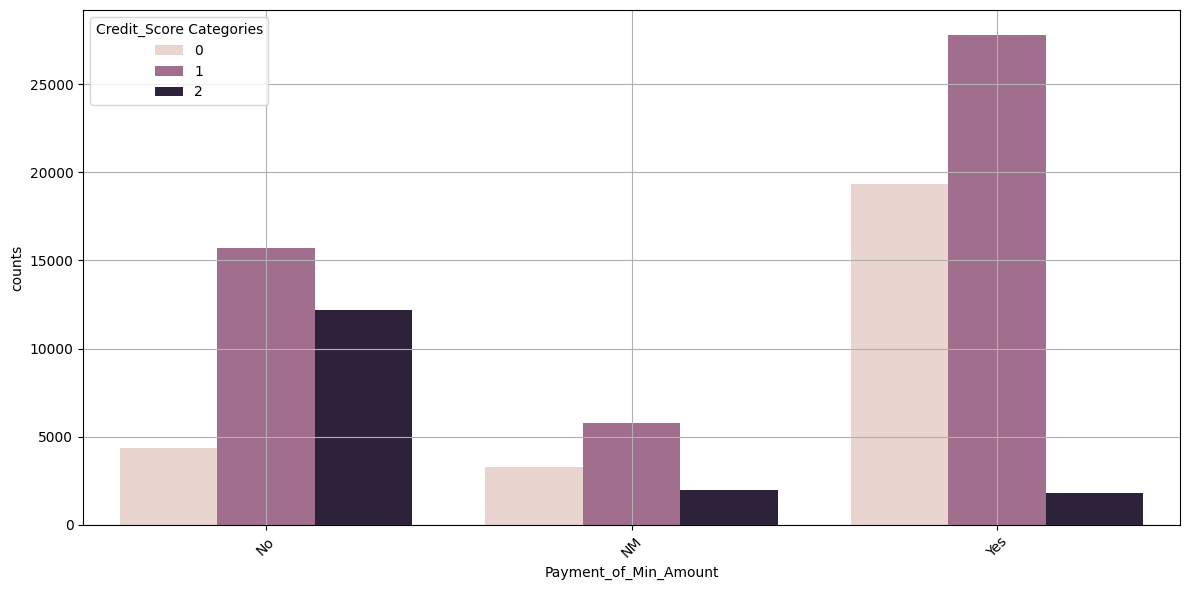

In [89]:
plt.figure(figsize=(12,6))
sb.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df)
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score Categories')
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
## Amount_invested_monthly

In [91]:
df.Amount_invested_monthly.nunique()

84073

In [92]:
non_numeric_values(df, 'Amount_invested_monthly')

{'.', 'nan'}

In [93]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [94]:
df[df['Amount_invested_monthly'] < 0]['Amount_invested_monthly'].unique()

array([], dtype=float64)

In [95]:
df.Amount_invested_monthly.value_counts().head(15)

Amount_invested_monthly
10000.000000    3941
0.000000         154
80.415295          1
82.080521          1
145.409315         1
96.326550          1
157.643452         1
89.570291          1
51.802287          1
98.026252          1
145.015755         1
129.360954         1
119.764204         1
323.629067         1
108.036088         1
Name: count, dtype: int64

In [96]:
df[df.Amount_invested_monthly.isna()].sample(15)

Age    Occupation Annual_Income  Monthly_Inhand_Salary  \
44630   43     Scientist      11115.32                    NaN   
56084   17  MediaManager      60335.25            5120.937500   
97726   30    Accountant      117588.2                    NaN   
41063   29     Architect      64840.32            5188.360000   
68019   55        Doctor      49217.68            4154.473333   
13547   39        Lawyer      31227.62                    NaN   
40230   31  Entrepreneur     141025.92           12004.160000   
63052   38       Teacher      15785.04            1369.420000   
94280   45     Architect     176020.16           14460.346667   
54273   47      Mechanic      45461.54                    NaN   
73778   36      Musician      31795.48                    NaN   
82146   18    Accountant      57786.12            4686.510000   
52809   30     Developer      39420.54            3389.045000   
44243   42       Teacher      16084.71            1514.392500   
39586   15        Doctor      18719.74            1843.978333   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
44630                  7                3              8            4   
56084                  9                9             15            2   
97726                  8                5             15            4   
41063                  6                7             18            6   
68019                  7                3              5            0   
13547                  0                4              1            2   
40230                  5                5             10            1   
63052                  8               10             18            2   
94280                  1                1              1            2   
54273                  6                3              5            2   
73778                  8                9             15            9   
82146                  6                6             32            6   
52809                  6                8             33            7   
44243                  7               10             25            6   
39586                  8                3             32            2   

       Delay_from_due_date  Num_of_Delayed_Payment  ... Payment_of_Min_Amount  \
44630                   28                     NaN  ...                   Yes   
56084                   41                    13.0  ...                   Yes   
97726                   19                    14.0  ...                    No   
41063                   29                     8.0  ...                   Yes   
68019                   18                    11.0  ...                    No   
13547                   17                     4.0  ...                    No   
40230                   10                    15.0  ...                    No   
63052                   32                    15.0  ...                   Yes   
94280                    1                    10.0  ...                    No   
54273                   20                     9.0  ...                    No   
73778                   18                    21.0  ...                   Yes   
82146                   21                    21.0  ...                   Yes   
52809                   25                    19.0  ...                   Yes   
44243                   16                    21.0  ...                   Yes   
39586                    7                     8.0  ...                   Yes   

       Total_EMI_per_month Amount_invested_monthly  \
44630         79791.000000                     NaN   
56084            92.425471                     NaN   
97726           216.468286                     NaN   
41063           190.803663                     NaN   
68019             0.000000                     NaN   
13547            26.872141                     NaN   
40230           117.514710                     NaN   
63052            17.379240                     NaN   
94280         

In [97]:
from sklearn.impute import KNNImputer

def knn_impute_column(df, column_name, n_neighbors=5):
    """
    Fill missing values in a specific column using KNN imputation.

    Parameters:
    df (DataFrame): The DataFrame containing the column to be imputed.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 5.

    Returns:
    DataFrame: The DataFrame with missing values in the specified column imputed.
    """

    # Extract the column to be imputed
    column_to_impute = df[[column_name]]

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the column
    column_imputed = imputer.fit_transform(column_to_impute)

    # Replace the original column with the imputed values
    df[column_name] = column_imputed

    return df

In [98]:
df = knn_impute_column(df, 'Amount_invested_monthly')

In [99]:
df = knn_impute_column(df, 'Num_of_Delayed_Payment')

In [100]:
df.Amount_invested_monthly.isna().sum()

0

In [101]:
df.Amount_invested_monthly.value_counts().head(10)

Amount_invested_monthly
633.430131      4128
10000.000000    3941
0.000000         154
80.415295          1
82.080521          1
145.409315         1
96.326550          1
157.643452         1
89.570291          1
51.802287          1
Name: count, dtype: int64

<Axes: xlabel='Amount_invested_monthly'>

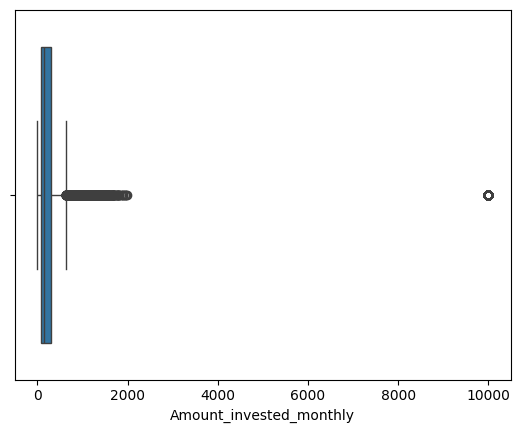

In [102]:
sb.boxplot(data= df, x = df['Amount_invested_monthly'])

In [103]:
df[df['Amount_invested_monthly'] == 10000]['Amount_invested_monthly'].count()

3941

In [104]:
## Payment_Behaviour

In [105]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      23661
HighspentMediumvaluepayments    16179
LowspentMediumvaluepayments     12777
HighspentLargevaluepayments     12569
HighspentSmallvaluepayments     10468
LowspentLargevaluepayments       9646
!@9#%8                           6994
Name: count, dtype: int64

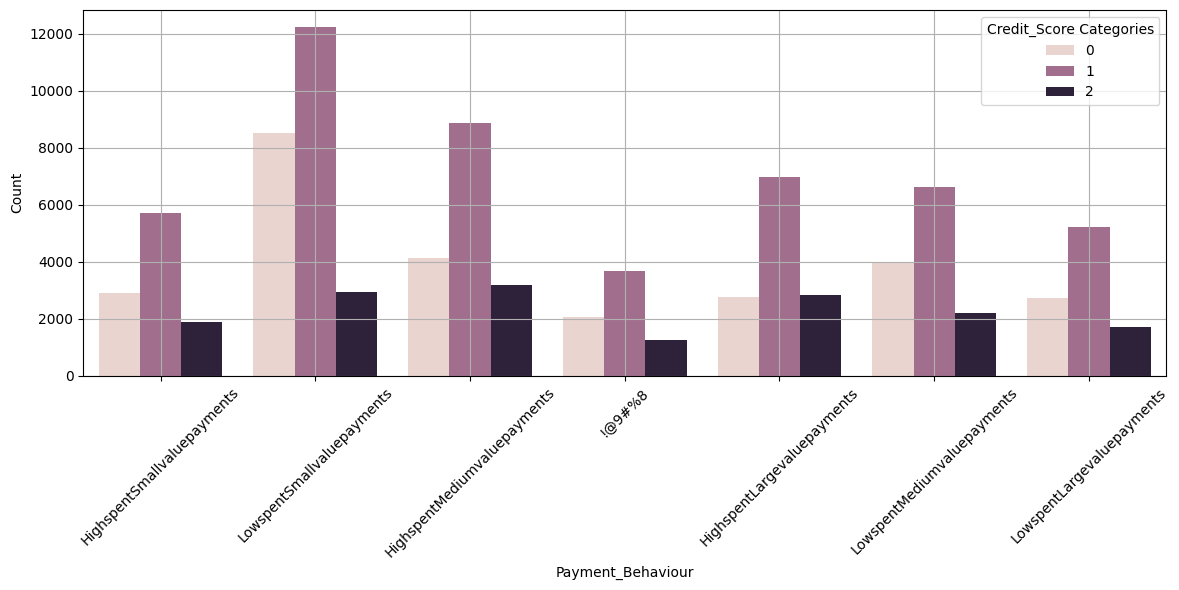

In [106]:
plt.figure(figsize=(12, 6))
sb.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df)
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score Categories')
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
# Replace '!@9#%8' with NaN
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# Impute missing values with mode
mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'].fillna(mode_value, inplace=True)

<ipython-input-107-ff248b4be446>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)
<ipython-input-107-ff248b4be446>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [108]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      30655
HighspentMediumvaluepayments    16179
LowspentMediumvaluepayments     12777
HighspentLargevaluepayments     12569
HighspentSmallvaluepayments     10468
LowspentLargevaluepayments       9646
Name: count, dtype: int64

In [109]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      30655
High_spent_Medium_value_payments    16179
Low_spent_Medium_value_payments     12777
High_spent_Large_value_payments     12569
High_spent_Small_value_payments     10468
Low_spent_Large_value_payments       9646
Name: count, dtype: int64

In [110]:
## Monthly_Balance

In [111]:
df.Monthly_Balance.isna().sum()

1123

In [112]:
non_numeric_values(df, 'Monthly_Balance')

{'-', '.', 'nan'}

In [113]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors = 'coerce')

In [114]:
df[df['Monthly_Balance'] < 0]['Monthly_Balance'].count()

9

In [115]:
df.drop(df[df['Monthly_Balance'] < 0].index , inplace= True)

In [116]:
df['Monthly_Balance'].value_counts().head(15)

Monthly_Balance
312.494089    1
286.520067    1
395.106225    1
440.468000    1
411.910035    1
397.622255    1
327.670436    1
399.045287    1
355.826255    1
199.856971    1
304.184097    1
539.684346    1
614.241341    1
519.046009    1
494.545161    1
Name: count, dtype: int64

In [117]:
print('Max:',df['Monthly_Balance'].max())
print('Min:',df['Monthly_Balance'].min())
print('Mean:',df['Monthly_Balance'].mean())

Max: 1602.0405189622518
Min: 0.0077596647753352
Mean: 401.10228551214993


In [118]:
df = knn_impute_column(df, 'Monthly_Balance')
df.Monthly_Balance.isna().sum()

0

<Axes: xlabel='Monthly_Balance'>

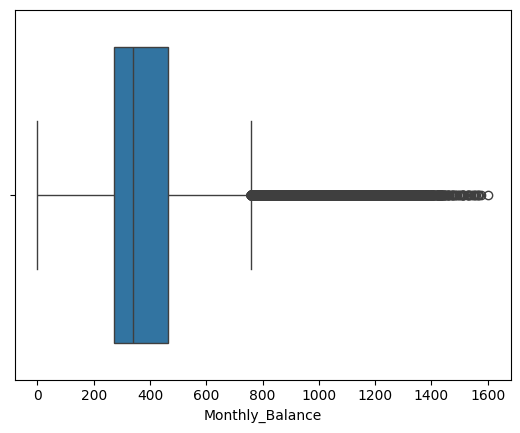

In [119]:
sb.boxplot(data= df,x=df.Monthly_Balance)

In [120]:
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92285 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        92285 non-null  int64  
 1   Occupation                 92285 non-null  object 
 2   Annual_Income              92285 non-null  float64
 3   Monthly_Inhand_Salary      78440 non-null  float64
 4   Num_Bank_Accounts          92285 non-null  int64  
 5   Num_Credit_Card            92285 non-null  int64  
 6   Interest_Rate              92285 non-null  int64  
 7   Num_of_Loan                92285 non-null  int64  
 8   Delay_from_due_date        92285 non-null  int64  
 9   Num_of_Delayed_Payment     92285 non-null  float64
 10  Changed_Credit_Limit       90351 non-null  object 
 11  Num_Credit_Inquiries       90475 non-null  float64
 12  Credit_Mix                 92285 non-null  object 
 13  Outstanding_Debt           92285 non-null  float64


In [121]:
df.drop(columns=['Changed_Credit_Limit','Credit_History_Years','Credit_History_Months'],inplace = True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92285 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        92285 non-null  int64  
 1   Occupation                 92285 non-null  object 
 2   Annual_Income              92285 non-null  float64
 3   Monthly_Inhand_Salary      78440 non-null  float64
 4   Num_Bank_Accounts          92285 non-null  int64  
 5   Num_Credit_Card            92285 non-null  int64  
 6   Interest_Rate              92285 non-null  int64  
 7   Num_of_Loan                92285 non-null  int64  
 8   Delay_from_due_date        92285 non-null  int64  
 9   Num_of_Delayed_Payment     92285 non-null  float64
 10  Num_Credit_Inquiries       90475 non-null  float64
 11  Credit_Mix                 92285 non-null  object 
 12  Outstanding_Debt           92285 non-null  float64
 13  Credit_Utilization_Ratio   92285 non-null  float64


In [123]:
## Visualisations

<Axes: >

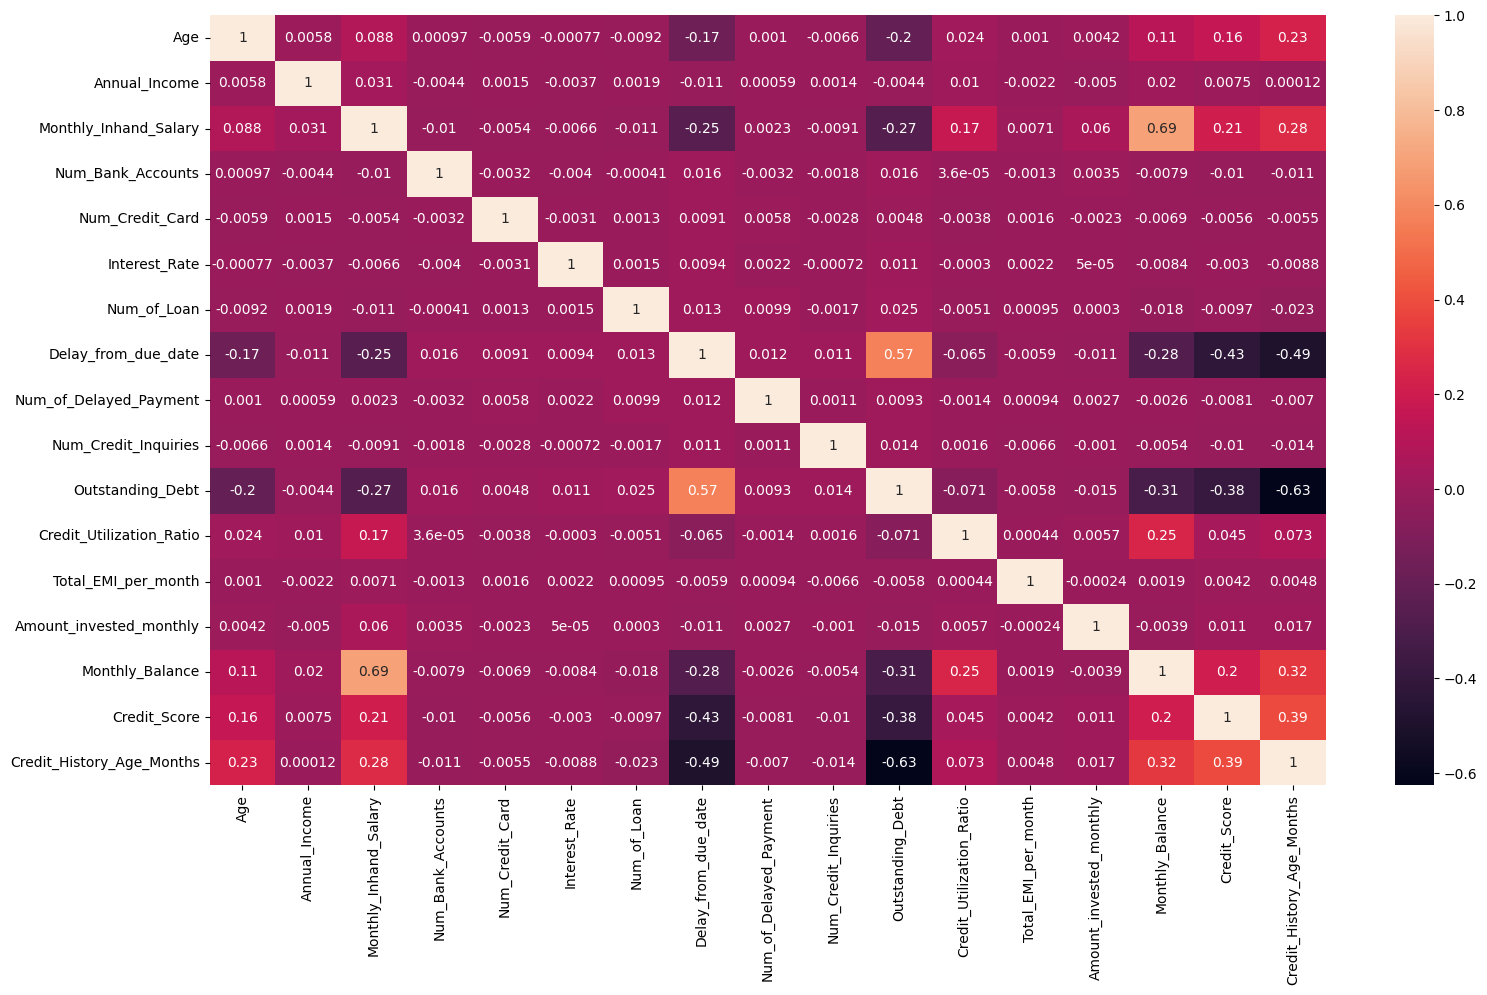

In [124]:
plt.figure(figsize=(18, 10))
sb.heatmap(df.select_dtypes(include='number').corr(), annot = True)

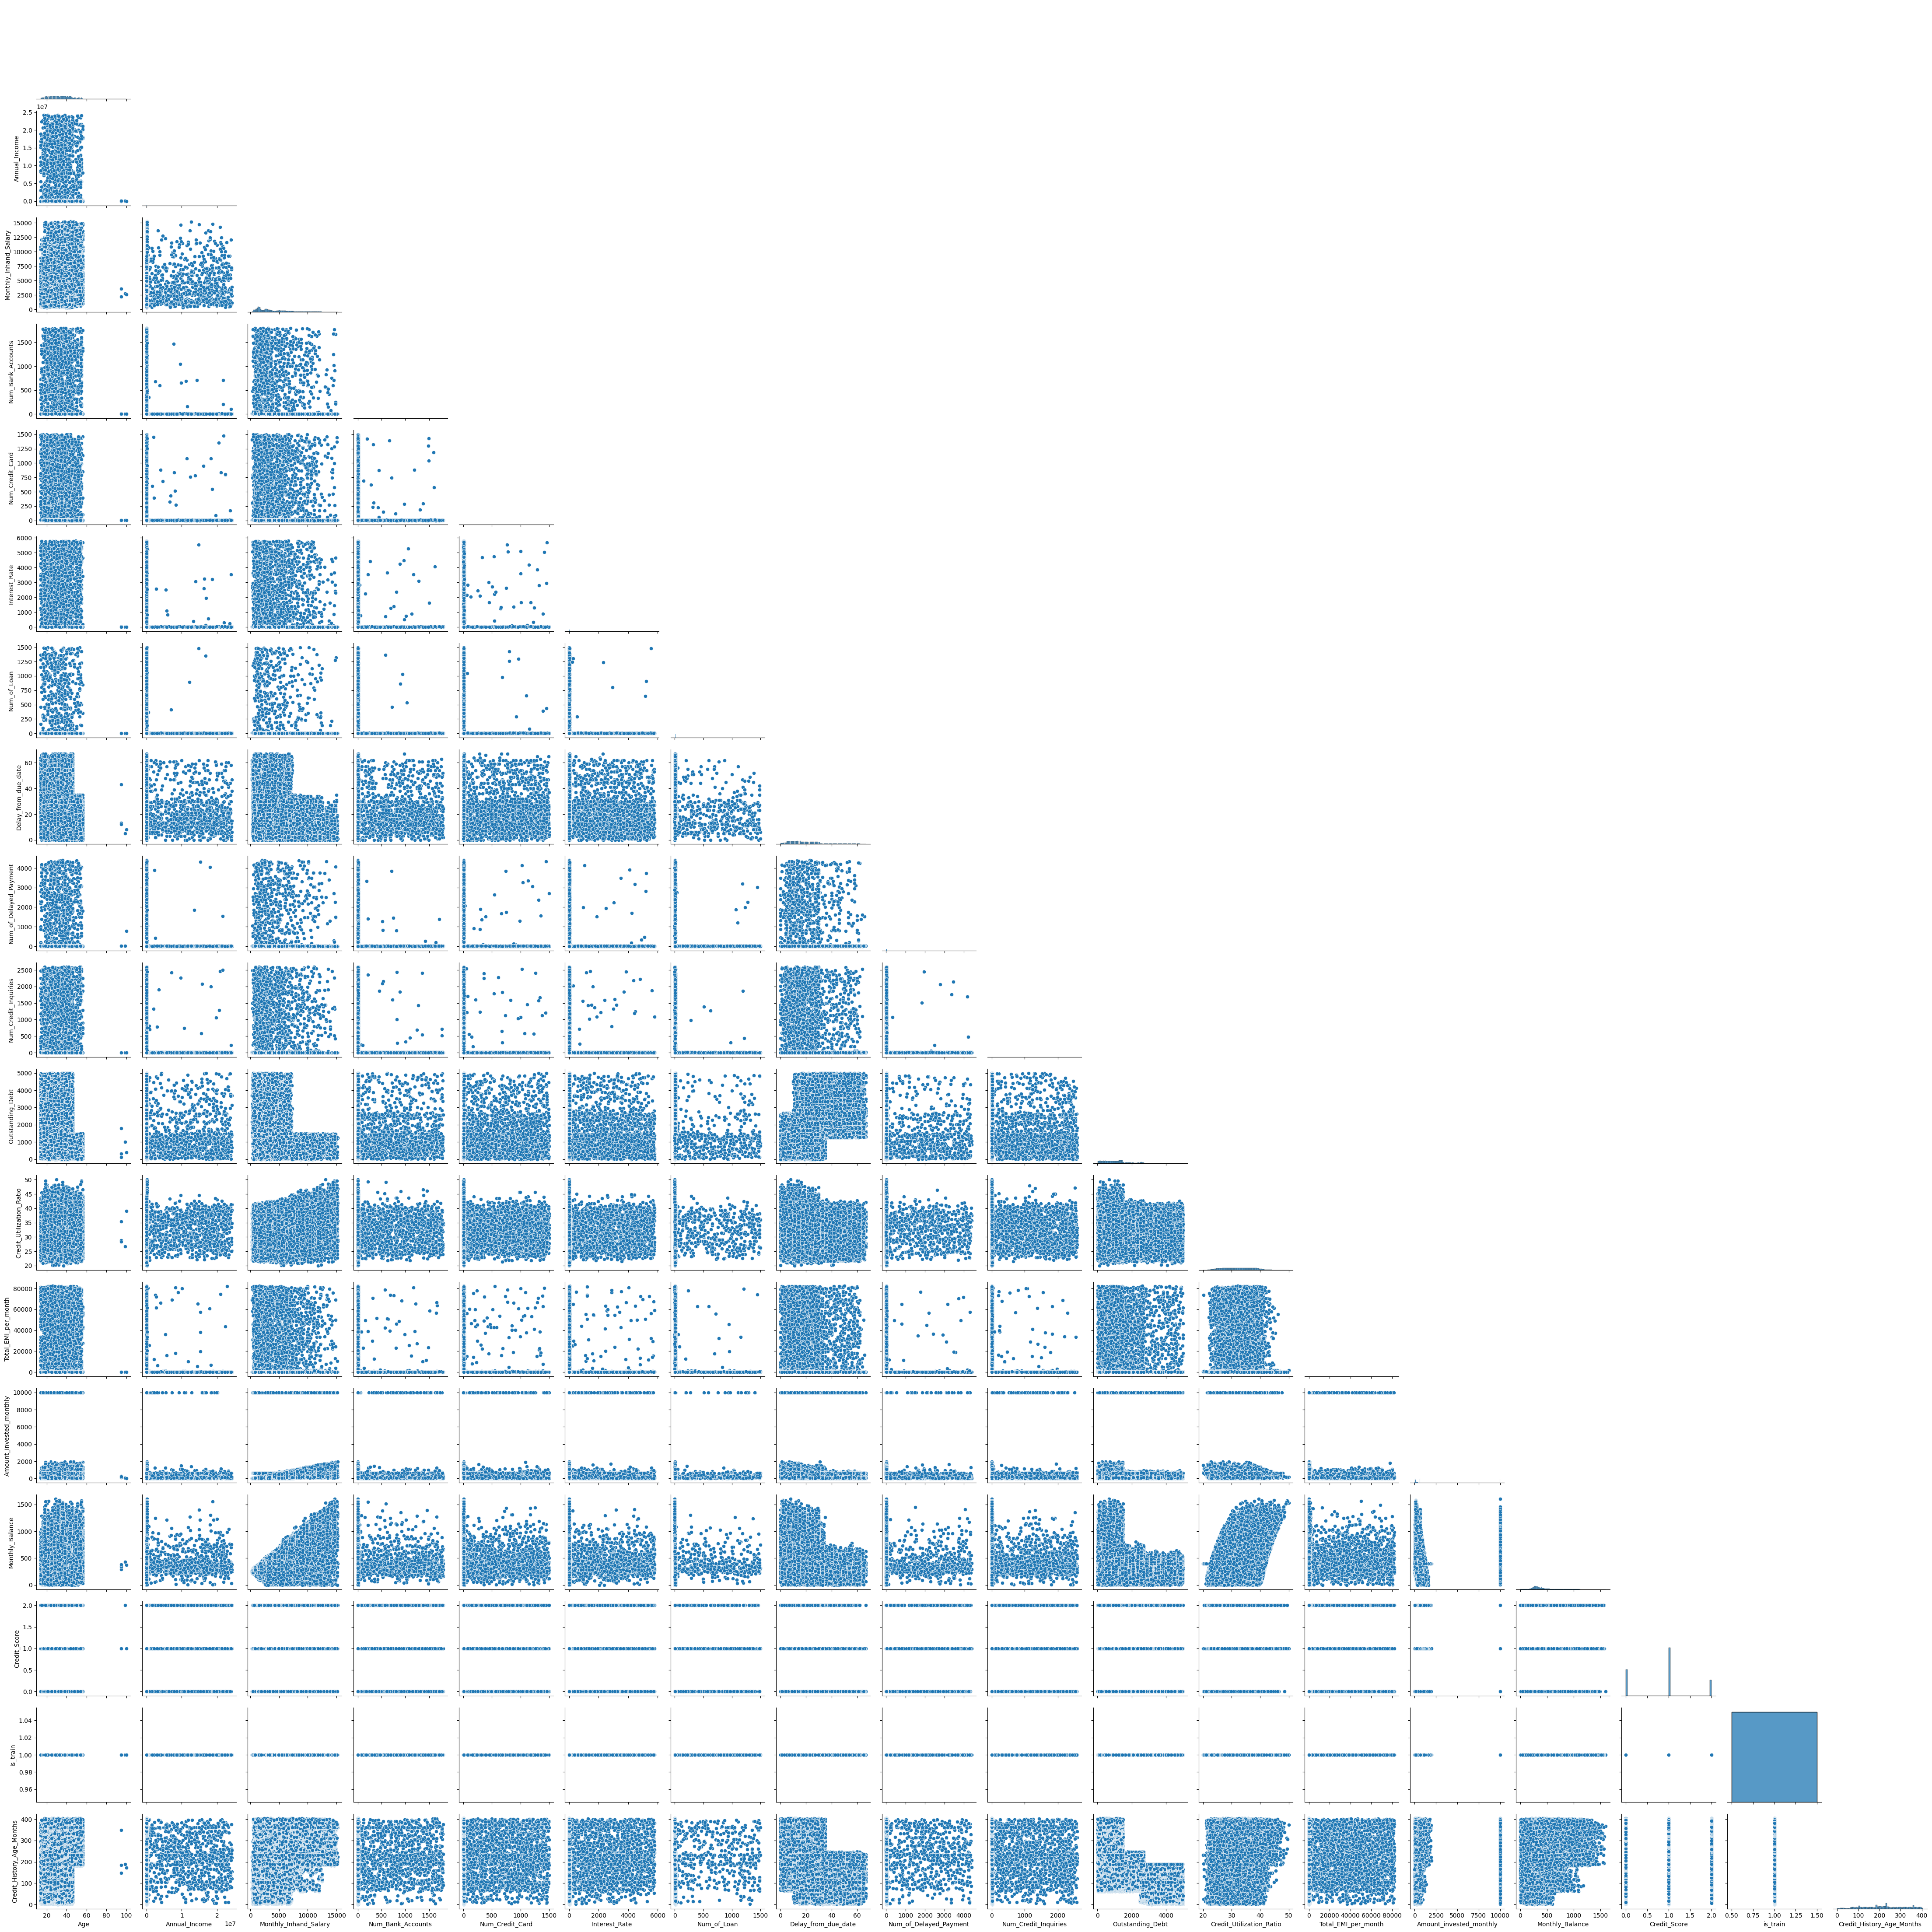

In [125]:
sb.pairplot(df, corner=True);

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92285 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        92285 non-null  int64  
 1   Occupation                 92285 non-null  object 
 2   Annual_Income              92285 non-null  float64
 3   Monthly_Inhand_Salary      78440 non-null  float64
 4   Num_Bank_Accounts          92285 non-null  int64  
 5   Num_Credit_Card            92285 non-null  int64  
 6   Interest_Rate              92285 non-null  int64  
 7   Num_of_Loan                92285 non-null  int64  
 8   Delay_from_due_date        92285 non-null  int64  
 9   Num_of_Delayed_Payment     92285 non-null  float64
 10  Num_Credit_Inquiries       90475 non-null  float64
 11  Credit_Mix                 92285 non-null  object 
 12  Outstanding_Debt           92285 non-null  float64
 13  Credit_Utilization_Ratio   92285 non-null  float64


In [127]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [128]:
payment_mapping = {'High_spent_Large_value_payments':6,
                   'High_spent_Medium_value_payments':4,
                   'High_spent_Small_value_payments':5,
                   'Low_spent_Large_value_payments':3,
                   'Low_spent_Medium_value_payments':2,
                   'Low_spent_Small_value_payments':1,
                   }

df['Payment_Behaviour'] = df['Payment_Behaviour'].map(payment_mapping)
df['Payment_Behaviour'] = pd.to_numeric(df['Payment_Behaviour'], downcast = 'integer')

In [129]:
df['Credit_Mix'] = df['Credit_Mix'].map({'Good':2,'Standard':1,'Bad':0})
df['Credit_Mix'] = pd.to_numeric(df['Credit_Mix'], downcast='integer')

In [130]:
df['Credit_Mix'].value_counts()

Credit_Mix
1.0    34128
2.0    21738
0.0    17754
Name: count, dtype: int64

In [131]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    48963
No     32258
NM     11064
Name: count, dtype: int64

In [132]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'Yes':1,'No':0})
df['Payment_of_Min_Amount'] = pd.to_numeric(df['Payment_of_Min_Amount'], downcast='integer')

In [133]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
1.0    48963
0.0    32258
Name: count, dtype: int64

In [134]:
df['Occupation'].value_counts()

Occupation
Other           6501
Lawyer          6069
Architect       5842
Engineer        5834
Scientist       5819
Mechanic        5811
Accountant      5806
Teacher         5765
Entrepreneur    5712
MediaManager    5703
Developer       5695
Doctor          5620
Journalist      5612
Manager         5526
Writer          5492
Musician        5478
Name: count, dtype: int64

In [135]:
df = pd.get_dummies(df, columns=['Occupation'])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92285 entries, 0 to 99999
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        92285 non-null  int64  
 1   Annual_Income              92285 non-null  float64
 2   Monthly_Inhand_Salary      78440 non-null  float64
 3   Num_Bank_Accounts          92285 non-null  int64  
 4   Num_Credit_Card            92285 non-null  int64  
 5   Interest_Rate              92285 non-null  int64  
 6   Num_of_Loan                92285 non-null  int64  
 7   Delay_from_due_date        92285 non-null  int64  
 8   Num_of_Delayed_Payment     92285 non-null  float64
 9   Num_Credit_Inquiries       90475 non-null  float64
 10  Credit_Mix                 73620 non-null  float64
 11  Outstanding_Debt           92285 non-null  float64
 12  Credit_Utilization_Ratio   92285 non-null  float64
 13  Payment_of_Min_Amount      81221 non-null  float64


In [137]:
# Separate features and target variable
X = df.drop("Credit_Score", axis=1)
y = df.Credit_Score

In [138]:
y.value_counts(normalize=True)

Credit_Score
1    0.534139
0    0.292713
2    0.173148
Name: proportion, dtype: float64

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, stratify=y, random_state=42)

In [140]:
robust_columns = ['Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', "Annual_Income", "monthly_inhand_salary"]


In [141]:
df['Monthly_Inhand_Salary']

0        1824.843333
3                NaN
4        1824.843333
5                NaN
6        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 92285, dtype: float64

In [142]:
non_numeric_values(df, 'Monthly_Inhand_Salary')

{'.', 'nan'}

In [143]:
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')
#df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [144]:
non_numeric_values(df, 'Monthly_Inhand_Salary')

{'.', 'nan'}

In [145]:
#Occupation_MediaManager      0.003564
#X_train.drop(columns=['Occupation_Other','Occupation_Entrepreneur','Occupation_Scientist','Occupation_Developer','Occupation_Teacher','Occupation_Lawyer','Occupation_Manager','Occupation_Doctor','Occupation_Accountant','Occupation_Mechanic','Occupation_Musician','Occupation_Engineer','Occupation_Architect','Occupation_Journalist','Occupation_MediaManager','Occupation_Writer','is_train'], inplace= True)
#X_test.drop(columns=['Occupation_Other','Occupation_Entrepreneur','Occupation_Scientist','Occupation_Developer','Occupation_Teacher','Occupation_Lawyer','Occupation_Manager','Occupation_Doctor','Occupation_Accountant','Occupation_Mechanic','Occupation_Musician','Occupation_Engineer','Occupation_Architect','Occupation_Journalist','Occupation_MediaManager','Occupation_Writer','is_train'], inplace= True)


In [146]:
X_train['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True)
X_train['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)
X_test['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True)
X_test['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)

<ipython-input-146-8120db8fea87>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True)
<ipython-input-146-8120db8fea87>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

In [147]:
X_train['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0], inplace=True)
X_train['Payment_of_Min_Amount'].fillna(df['Payment_of_Min_Amount'].mode()[0], inplace=True)
X_test['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0], inplace=True)
X_test['Payment_of_Min_Amount'].fillna(df['Payment_of_Min_Amount'].mode()[0], inplace=True)

<ipython-input-147-603252df62a0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0], inplace=True)
<ipython-input-147-603252df62a0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [148]:
# Columns to apply RobustScaler
robust_columns = ['Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', "Annual_Income", "Monthly_Inhand_Salary"]

# Columns to apply StandardScaler (All columns except robust columns)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Create the ColumnTransformer
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)])

# Apply to training data
X_train_scaled= scaler.fit_transform(X_train)

# Apply to test data
X_test_scaled = scaler.transform(X_test)

In [149]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [150]:
pd.Series(y_train).value_counts()

1    46828
0    25662
2    15180
Name: count, dtype: int64

In [151]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [152]:
X_train.shape[1]

36

In [153]:
## ANN Model

In [154]:
# Compute class_weights
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: weight for i, weight in zip(np.unique(y_train), class_weights_array)}

In [155]:
tf.random.set_seed(42)

# Model architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu',),
    BatchNormalization(),
    Dropout(0.35),

    Dense(512, activation='relu', kernel_regularizer=l1(1e-4)),
    BatchNormalization(),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(3, activation='softmax')
])

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping with patience and best weight restoration
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=35,
                               restore_best_weights=True)

# Model training
history = model.fit(x=X_train_scaled,
                    y=y_train,
                    validation_data=(X_test_scaled, y_test),
                    batch_size=1024,
                    epochs=500,
                    verbose=1,
                    callbacks=[early_stopping], class_weight=class_weights)

Epoch 1/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.4321 - loss: 1.7422 - val_accuracy: 0.5874 - val_loss: 1.5306
Epoch 2/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.5141 - loss: 1.5205 - val_accuracy: 0.6150 - val_loss: 1.4368
Epoch 3/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.5516 - loss: 1.4569 - val_accuracy: 0.6134 - val_loss: 1.3934
Epoch 4/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.5673 - loss: 1.4122 - val_accuracy: 0.6178 - val_loss: 1.3659
Epoch 5/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5800 - loss: 1.3764 - val_accuracy: 0.6199 - val_loss: 1.3372
Epoch 6/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.5868 - loss: 1.3423 - val_accuracy: 0.6217 - val_loss: 1.3132
Epoch 7/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.5940 - loss: 1.3125 - val_accuracy: 0.6273 - val_loss: 1.2714
Epoch 8/500
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.6009 - loss: 1.2798 - val_accuracy:

<Axes: >

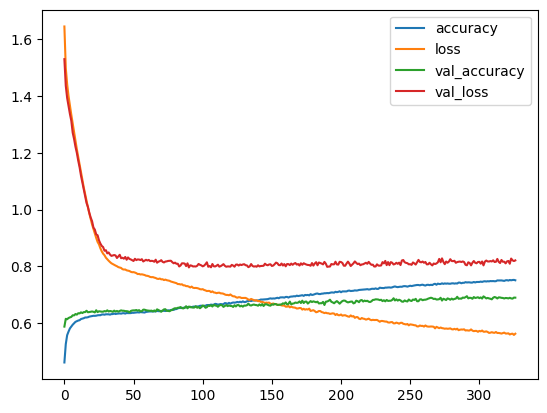

In [156]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [157]:
model.evaluate(X_test_scaled, y_test)

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6988 - loss: 0.7787


[0.8037405610084534, 0.6946912407875061]

In [158]:
model.evaluate(X_train_scaled, y_train)

2740/2740 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8089 - loss: 0.5166


[0.5181687474250793, 0.8082468509674072]

In [159]:
eval_metric(model, X_train_scaled, y_train, X_test_scaled, y_test)

2740/2740 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Set:
[[1135  139   77]
 [ 569 1420  476]
 [  25  123  651]]
              precision    recall  f1-score   support

           0       0.66      0.84      0.74      1351
           1       0.84      0.58      0.68      2465
           2       0.54      0.81      0.65       799

    accuracy                           0.69      4615
   macro avg       0.68      0.74      0.69      4615
weighted avg       0.74      0.69      0.69      4615


Train Set:
[[24416   861   385]
 [ 9189 31586  6053]
 [   53   270 14857]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.82     25662
           1       0.97      0.67      0.79     46828
           2       0.70      0.98      0.81     15180

    accuracy                           0.81     87670
   macro avg       0.80      0.87      0.81     87670
weighted avg       0.85      0.81      0.81     87670



In [160]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,027,083 (3.92 MB)

 Trainable params: 341,507 (1.30 MB)

 Non-trainable params: 2,560 (10.00 KB)

 Optimizer params: 683,016 (2.61 MB)

In [161]:
## Final Model

In [162]:
print(X.shape)
print(y.shape)

(92285, 36)
(92285,)


In [163]:
X['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True)
X['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)
X['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0], inplace=True)
X['Payment_of_Min_Amount'].fillna(df['Payment_of_Min_Amount'].mode()[0], inplace=True)

<ipython-input-163-e14f713425bd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True)
<ipython-input-163-e14f713425bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [164]:
# Columns to apply RobustScaler
robust_columns = ['Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', "Annual_Income", "Monthly_Inhand_Salary"]

# Columns to apply StandardScaler (All columns except robust columns)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Create the ColumnTransformer
scaler= ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)
    ]
)

scaler = scaler.fit(X)

In [165]:
pickle.dump(scaler, open("credit_score_scaler", 'wb'))

In [166]:
X_scaled = scaler.transform(X)

In [167]:
y.value_counts(normalize=True)

Credit_Score
1    0.534139
0    0.292713
2    0.173148
Name: proportion, dtype: float64

In [168]:
tf.random.set_seed(42)

# Model architecture
final_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu',),
    BatchNormalization(),
    Dropout(0.35),

    Dense(512, activation='relu', kernel_regularizer=l1(1e-4)),
    BatchNormalization(),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(3, activation='softmax')
])

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping with patience and best weight restoration
early_stopping = EarlyStopping(monitor='accuracy',
                               patience=35,
                               restore_best_weights=True)

# Model training
history = model.fit(x=X_scaled,
                    y=y,
                    batch_size=1024,
                    epochs=500,
                    verbose=1,
                    callbacks=[early_stopping], class_weight=class_weights)

Epoch 1/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7365 - loss: 0.5965
Epoch 2/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7342 - loss: 0.5955
Epoch 3/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.7357 - loss: 0.5896
Epoch 4/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7325 - loss: 0.5954
Epoch 5/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.7362 - loss: 0.5915
Epoch 6/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.7337 - loss: 0.5928
Epoch 7/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7350 - loss: 0.5918
Epoch 8/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7396 - loss: 0.5896
Epoch 9/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.7380 - loss: 0.5869
Epoch 10/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7377 - loss: 0.5903
Epoch 11/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.7386 - loss: 0.5865
Epoch 12/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/

In [169]:
save_model(final_model, 'final_model_credit_score.keras')

In [170]:
## Final Model Prediction

In [171]:
scaler = pickle.load(open("credit_score_scaler", "rb"))

In [172]:
final_model = load_model('final_model_credit_score.keras')


In [173]:
# Generating random data suitable for statistics using your sample dataset
def generate_synthetic_data(df, num_samples=50):
    synthetic_data = pd.DataFrame()

    for column in df.columns:
        if column != 'credit_score':  # Excluding the target column (e.g., for classification)
            # Extract statistics from your current dataset
            min_val = df[column].min()
            max_val = df[column].max()
            mean_val = df[column].mean()
            std_val = df[column].std()

            # Generate random data suitable for statistics
            synthetic_data[column] = np.random.normal(loc=mean_val, scale=std_val, size=num_samples)

            # Adjust the minimum and maximum values of the generated data to match the original dataset
            synthetic_data[column] = synthetic_data[column].clip(lower=min_val, upper=max_val)

    return synthetic_data

# Generating 50 rows of synthetic data based on the statistics of your current dataset
df_prediction = generate_synthetic_data(df, num_samples=50)

In [174]:
df_prediction_scaled = scaler.transform(df_prediction)

In [175]:
final_model.predict(df_prediction_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([[7.62607856e-03, 9.43658888e-01, 4.87150922e-02],
       [2.11748600e-01, 3.74462456e-01, 4.13788944e-01],
       [1.04559809e-01, 7.04735518e-01, 1.90704778e-01],
       [1.67935044e-02, 9.35772300e-01, 4.74342890e-02],
       [2.04593003e-01, 3.55981439e-01, 4.39425498e-01],
       [1.46029487e-01, 3.34051400e-01, 5.19919157e-01],
       [2.04639897e-01, 4.85619098e-01, 3.09740961e-01],
       [8.28320917e-04, 9.89140213e-01, 1.00314859e-02],
       [8.04530748e-04, 9.87875998e-01, 1.13193151e-02],
       [1.07807964e-01, 6.74382329e-01, 2.17809647e-01],
       [4.59382273e-02, 7.17553735e-01, 2.36507982e-01],
       [2.29379862e-06, 9.99866247e-01, 1.31516819e-04],
       [2.49468163e-01, 3.92299414e-01, 3.58232439e-01],
       [4.88231331e-02, 3.81037980e-01, 5.70138812e-01],
       [7.62952492e-02, 7.51701117e-01, 1.72003716e-01],
       [8.92951563e-02, 7.04995751e-01, 2.05708995e-01],
       [1.80813283e-01, 3.59089524e-01, 4.60097075e-01],
       [2.44178846e-01, 3.62099

In [176]:
y_pred_probabilities = final_model.predict(df_prediction_scaled)

y_pred = y_pred_probabilities.argmax(axis=1) #prediction values

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [177]:
normalized_predictions = tf.nn.softmax(y_pred_probabilities, axis=-1).numpy()#normalized probabilites of each class

In [178]:
pred_df = pd.DataFrame({'pred': y_pred})

# Mapping dictionary for the reverse transformation
mapping = {2: 'Good', 1: 'Standard', 0: 'Poor'}

# Apply the mapping
pred_df["pred"] = pred_df["pred"] .map(mapping)

In [179]:
pred_df["pred_proba_poor"] = normalized_predictions[:,0]
pred_df["pred_proba_standard"] = normalized_predictions[:,1]
pred_df["pred_proba_good"] = normalized_predictions[:,2]
pred_df

pred  pred_proba_poor  pred_proba_standard  pred_proba_good
0   Standard         0.217780             0.555305         0.226915
1       Good         0.294066             0.346027         0.359907
2   Standard         0.255597             0.465811         0.278592
3   Standard         0.220369             0.552405         0.227226
4       Good         0.291703             0.339381         0.368916
5       Good         0.273206             0.329722         0.397072
6   Standard         0.291100             0.385540         0.323360
7   Standard         0.212950             0.572131         0.214919
8   Standard         0.213041             0.571666         0.215293
9   Standard         0.257832             0.454356         0.287812
10  Standard         0.239961             0.469700         0.290339
11  Standard         0.211952             0.576068         0.211980
12  Standard         0.305957             0.352932         0.341111
13      Good         0.245201             0.341822         0.412977
14  Standard         0.245986             0.483321         0.270693
15  Standard         0.251609             0.465717         0.282673
16      Good         0.284306             0.339790         0.375904
17      Good         0.304279             0.342361         0.353360
18      Good         0.321147             0.338541         0.340313
19  Standard         0.269334             0.389597         0.341069
20  Standard         0.213910             0.569173         0.216918
21  Standard         0.244709             0.497026         0.258264
22      Good         0.305713             0.343285         0.351002
23  Standard         0.217729             0.558594         0.223677
24  Standard         0.240426             0.420995         0.338578
25  Standard         0.212035             0.575722         0.212244
26      Good         0.288462             0.335846         0.375693
27  Standard         0.314097             0.345700         0.340203
28      Good         0.317777             0.338927         0.343296
29  Standard         0.225488             0.532384         0.242128
30  Standard         0.302684             0.372054         0.325262
31  Standard         0.321561             0.343904         0.334536
32      Good         0.257380             0.357112         0.385507
33  Standard         0.287067             0.359026         0.353907
34  Standard         0.234075             0.507461         0.258465
35  Standard         0.228727             0.532343         0.238930
36      Good         0.253458             0.328713         0.417829
37      Good         0.313497             0.341410         0.345093
38  Standard         0.211963             0.576018         0.212019
39  Standard         0.212221             0.575000         0.212778
40  Standard         0.230492             0.520041         0.249467
41  Standard         0.211985             0.575929         0.212085
42      Good         0.256955             0.367604         0.375441
43      Good         0.304437             0.324900         0.370663
44      Good         0.276790             0.348597         0.374612
45  Standard         0.251304             0.477754         0.270942
46      Good         0.237794             0.296296         0.465910
47  Standard         0.212763             0.573309         0.213929
48      Good         0.239947             0.329148         0.430905
49  Standard         0.213159             0.571786         0.215055